<a href="https://colab.research.google.com/github/Ferrariagustinpablo/Data-Analytics-in-R/blob/main/Categorical_Data_forcats_%2B_ggplot_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary:


Import libraries
Import dataset

Qualitative variables

1) mutate_if(), summarise_if, mutate_all() and summarise_all
2) gather() from tidyr takes a dataset from wide to long format.
3) top_n() and pull()
4) Extracting levels of a factor
5) Forcats package for reordering categorical variables
5)a) unordered Bar plot
5)b) ordered levels by frequency: fct_infreq()
5)c) order levels inside mutate by another variable (like mean_age)
6) Reordering factors by inherent ordering
6)a) fct_relevel()
6)b) Tricks for fct_reorder
7) Renaming factors with fct_recode()
8) Collapsing levels with fct_collapse, fct_other and fct_lump
8)a) fct_collapse and fct_other
8)b) fct_lump
9) Grouping and reshaping similar columns with select(contains) and gather()
10) Summarizing data with count() and add_count()
11) Mapping. Renaming from factors to numbers with if_else
12) CASE_WHEN(): mapping with conditions
12)a) case_when() with single variable
12)b) case_when() two or more variables to map

GGPLOT Tricks

1) Editing plot text and showing percentages
2) Reordering graphs and changing angles on axis


# Import libraries

In [2]:
# Load  
library(dplyr)
library(ggplot2)
library(tidyr)
library(forcats)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Import dataset

# Qualitative variables

There are two ways R can represent qualitative variables: as factors or as characters

In [128]:
multiple_choice_responses = read.csv("/content/multipleChoiceResponses.csv")
str(multiple_choice_responses)

'data.frame':	16716 obs. of  228 variables:
 $ GenderSelect                               : chr  "Non-binary, genderqueer, or gender non-conforming" "Female" "Male" "Male" ...
 $ Country                                    : chr  "" "United States" "Canada" "United States" ...
 $ Age                                        : int  NA 30 28 56 38 46 35 22 43 33 ...
 $ EmploymentStatus                           : chr  "Employed full-time" "Not employed, but looking for work" "Not employed, but looking for work" "Independent contractor, freelancer, or self-employed" ...
 $ StudentStatus                              : chr  "" "" "" "" ...
 $ LearningDataScience                        : chr  "" "" "" "" ...
 $ CodeWriter                                 : chr  "Yes" "" "" "Yes" ...
 $ CareerSwitcher                             : chr  "" "" "" "" ...
 $ CurrentJobTitleSelect                      : chr  "DBA/Database Engineer" "" "" "Operations Research Practitioner" ...
 $ TitleFit              

## 1) mutate_if(), summarise_if, mutate_all() and summarise_all

There are more handy functions - summarise_at() and mutate_at(). These let you select columns by name-based select helpers.

In [68]:
# Change all the character columns to factors
responses_as_factors <- multiple_choice_responses %>% 
  mutate_if(is.character, as.factor)

In [69]:
responses_as_factors %>% 
  # apply the function nlevels to each column
  summarise_all(nlevels)

GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,⋯,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,53,0,7,3,4,3,3,17,4,⋯,4,4,4,4,4,4,4,4,4,4


## 2) gather() from tidyr takes a dataset from wide to long format.

In [70]:
number_of_levels <- responses_as_factors %>% 
  # apply the function nlevels to each column
  summarise_all(nlevels) %>%
  # change the dataset from wide to long
  gather(variable, num_levels)

head(number_of_levels,4)

,variable,num_levels
,<chr>,<int>
1,GenderSelect,5
2,Country,53
3,Age,0
4,EmploymentStatus,7


## 3) top_n() and pull()

In [71]:
# Select the 3 rows with the highest number of levels 
number_of_levels %>%
    top_n(3, num_levels)

variable,num_levels
<chr>,<int>
LearningPlatformSelect,5363
WorkToolsSelect,5249
WorkMethodsSelect,6191


In [72]:
number_of_levels %>%
	# filter for where the column called variable equals CurrentJobTitleSelect
    filter(variable == "CurrentJobTitleSelect") %>%
	# pull num_levels
    pull(num_levels)

[1] 17

## 4) Extracting levels of a factor 

In [73]:
responses_as_factors %>%
    # pull CurrentJobTitleSelect
    pull(CurrentJobTitleSelect) %>%
    # get the values of the levels
    levels()

[1] ""                                    
 [2] "Business Analyst"                    
 [3] "Computer Scientist"                  
 [4] "Data Analyst"                        
 [5] "Data Miner"                          
 [6] "Data Scientist"                      
 [7] "DBA/Database Engineer"               
 [8] "Engineer"                            
 [9] "Machine Learning Engineer"           
[10] "Operations Research Practitioner"    
[11] "Other"                               
[12] "Predictive Modeler"                  
[13] "Programmer"                          
[14] "Researcher"                          
[15] "Scientist/Researcher"                
[16] "Software Developer/Software Engineer"
[17] "Statistician"

In [74]:
# or
levels(responses_as_factors$CurrentJobTitleSelect)

[1] ""                                    
 [2] "Business Analyst"                    
 [3] "Computer Scientist"                  
 [4] "Data Analyst"                        
 [5] "Data Miner"                          
 [6] "Data Scientist"                      
 [7] "DBA/Database Engineer"               
 [8] "Engineer"                            
 [9] "Machine Learning Engineer"           
[10] "Operations Research Practitioner"    
[11] "Other"                               
[12] "Predictive Modeler"                  
[13] "Programmer"                          
[14] "Researcher"                          
[15] "Scientist/Researcher"                
[16] "Software Developer/Software Engineer"
[17] "Statistician"

In [75]:
# to know only number of levels
nlevels(responses_as_factors$CurrentJobTitleSelect)

[1] 17

## 5) Forcats package for reordering categorical variables

### 5)a) unordered Bar plot 

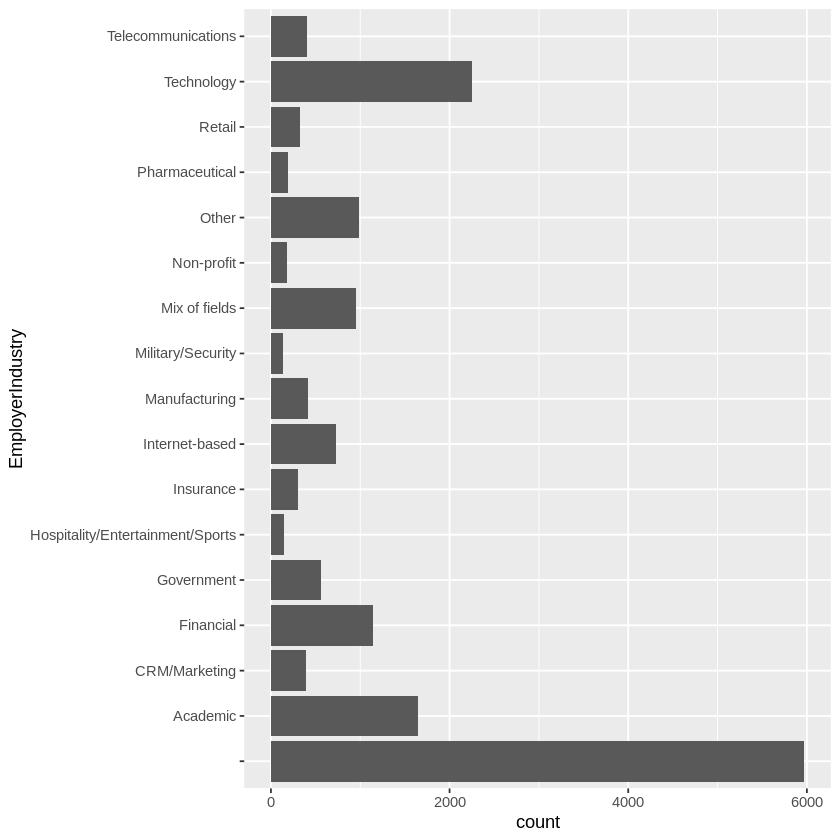

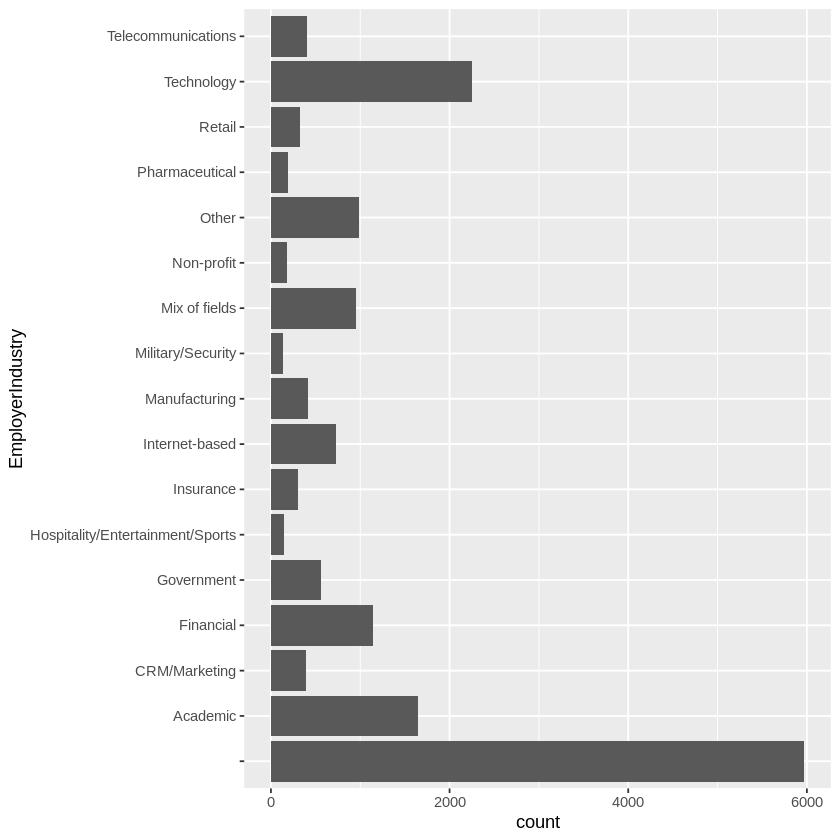

In [76]:
# Make a bar plot
ggplot(multiple_choice_responses, aes(y = EmployerIndustry)) + 
    geom_bar() 

#or

# Make a bar plot
ggplot(multiple_choice_responses, aes(x = EmployerIndustry)) + 
    geom_bar() + 
    # flip the coordinates
    coord_flip()

### 5)b) ordered levels by frequency: fct_infreq()

In [77]:
library(forcats)

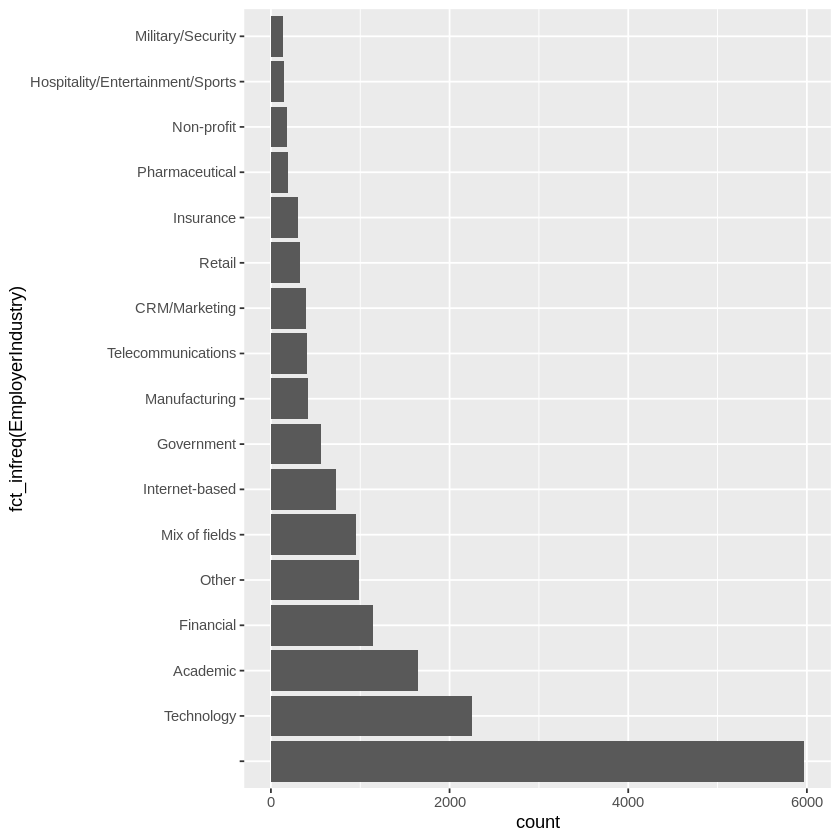

In [78]:
# Make a bar plot 
ggplot(multiple_choice_responses, aes(x = fct_infreq(EmployerIndustry))) + 
    geom_bar() + 
    # flip the coordinates
    coord_flip()

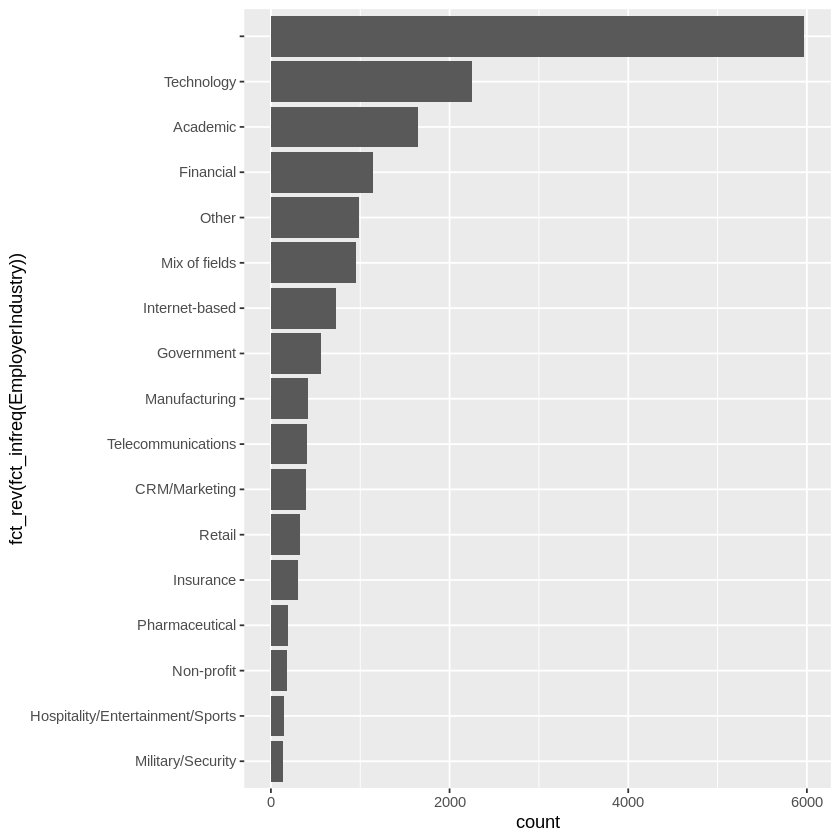

In [79]:
# Make a bar plot 
ggplot(multiple_choice_responses, aes(x = fct_rev(fct_infreq(EmployerIndustry)))) + 
    geom_bar() + 
    # flip the coordinates
    coord_flip()

### 5)c) order levels inside mutate by another variable (like mean_age)

### fct_reorder

In [80]:
industry_age <- multiple_choice_responses %>%
  # remove NAs
  filter(!is.na(EmployerIndustry) & !is.na(Age)) %>%
  # get mean_age by EmployerIndustry
  group_by(EmployerIndustry) %>%
  summarise(mean_age = mean(Age)) %>%
  # reorder EmployerIndustry by mean_age 
  mutate(EmployerIndustry = fct_reorder(EmployerIndustry, mean_age))

industry_age

EmployerIndustry,mean_age
<fct>,<dbl>
,29.64275
Academic,34.67181
CRM/Marketing,33.07050
Financial,33.44494
Government,37.02904
Hospitality/Entertainment/Sports,32.56643
Insurance,34.50993
Internet-based,32.43036
Manufacturing,36.04136


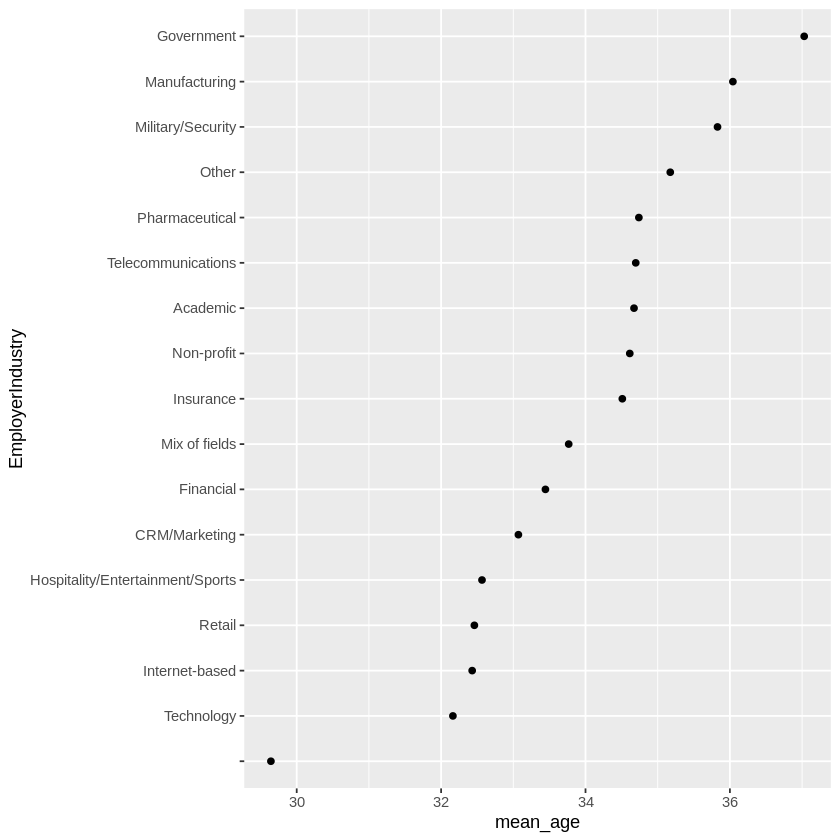

In [81]:
industry_age %>%
  ggplot(aes(x = EmployerIndustry, y = mean_age)) + 
    geom_point() + 
    coord_flip()

## 6) Reordering factors by inherent ordering

### 6)a) fct_relevel()

In [82]:
# Get the levels of WorkInternalVsExternalTools
levels(multiple_choice_responses$WorkInternalVsExternalTools)

NULL

In [83]:
unique(multiple_choice_responses$WorkInternalVsExternalTools)

[1] "Do not know"                                  
[2] ""                                             
[3] "Entirely internal"                            
[4] "Approximately half internal and half external"
[5] "More internal than external"                  
[6] "More external than internal"                  
[7] "Entirely external"

In [84]:
# Manually change the order of the levels to go from internal to external, with "Do not know" last 
mc_responses_reordered <- multiple_choice_responses %>%
    mutate(WorkInternalVsExternalTools = fct_relevel(WorkInternalVsExternalTools, 
    "Entirely internal", "More internal than external", 
    "Approximately half internal and half external", 
    "More external than internal", "Entirely external", 
    "Do not know"))

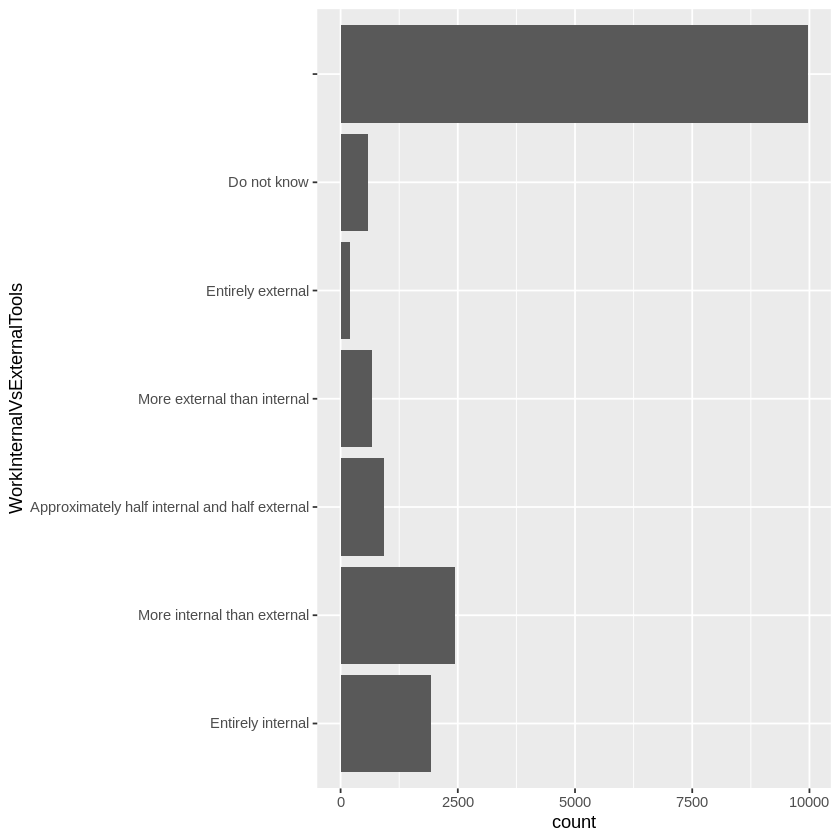

In [85]:
# Make a bar plot of the responses
ggplot(mc_responses_reordered, aes(WorkInternalVsExternalTools)) + 
    geom_bar() + 
    coord_flip()

### 6)b) Tricks for fct_reorder

the name of each level had to be written out to explicitly reorder the factor. But sometimes you have many levels and only need to move one. Instead of writing out all the levels, you can use some helper arguments in fct_relevel() to save you some typing.

In [86]:
multiple_choice_responses %>%
    # Move "I did not complete any formal education past high school" and "Some college/university study without earning a bachelor's degree" to the front
    mutate(FormalEducation = fct_relevel(FormalEducation, 
    "I did not complete any formal education past high school", 
    "Some college/university study without earning a bachelor's degree")) %>%
    # Move "I prefer not to answer" to be the last level.
    mutate(FormalEducation = fct_relevel(FormalEducation, "I prefer not to answer", after = Inf)) %>%
    # Move "Doctoral degree" to be after the 5th level
    mutate(FormalEducation = fct_relevel(FormalEducation, "Doctoral degree", after = 5)) %>%
    # Examine the new level order
    pull(FormalEducation) %>%
    levels()

[1] "I did not complete any formal education past high school"         
[2] "Some college/university study without earning a bachelor's degree"
[3] ""                                                                 
[4] "Bachelor's degree"                                                
[5] "Master's degree"                                                  
[6] "Doctoral degree"                                                  
[7] "Professional degree"                                              
[8] "I prefer not to answer"

## 7) Renaming factors with fct_recode()

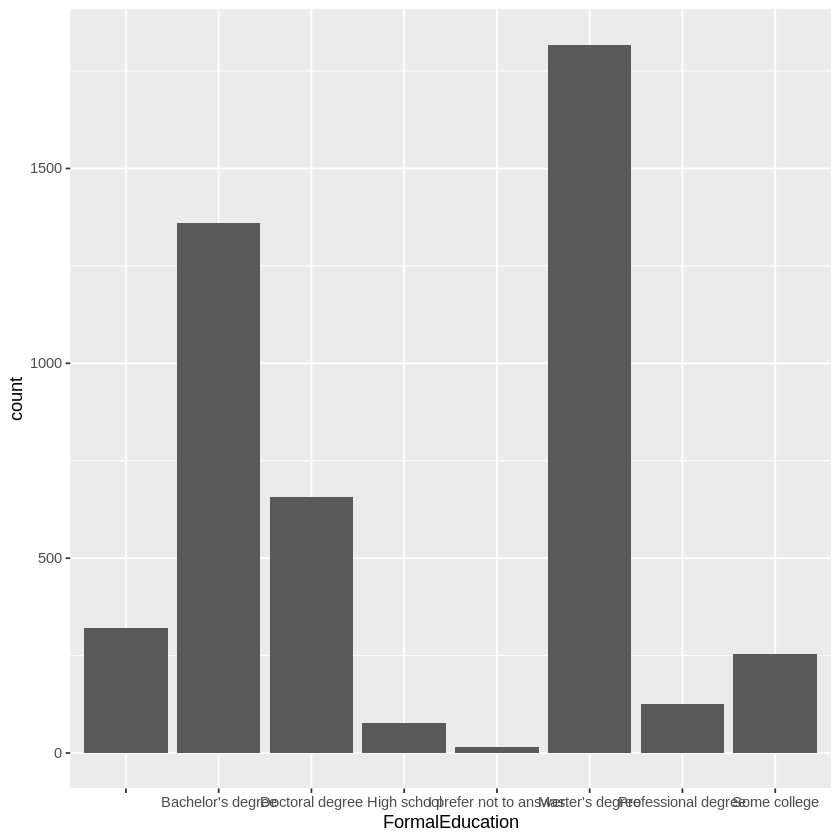

In [24]:
multiple_choice_responses %>%
    # rename the appropriate levels to "High school" and "Some college"
    mutate(FormalEducation = fct_recode(FormalEducation, 
    "High school" = "I did not complete any formal education past high school", 
    "Some college" = "Some college/university study without earning a bachelor's degree")) %>%
    # make a bar plot of FormalEducation
    ggplot(aes(x = FormalEducation)) + 
    geom_bar()

## 8) Collapsing levels with fct_collapse, fct_other and fct_lump

### 8)a) fct_collapse and fct_other

In [87]:
multiple_choice_responses %>%
    # Create new variable, grouped_titles, by collapsing levels in CurrentJobTitleSelect
    mutate(grouped_titles = fct_collapse(CurrentJobTitleSelect, 
        "Computer Scientist" = c("Programmer", "Software Developer/Software Engineer"), 
        "Researcher" = "Scientist/Researcher", 
        "Data Analyst/Scientist/Engineer" = c("DBA/Database Engineer", "Data Scientist", 
                                          "Business Analyst", "Data Analyst", 
                                          "Data Miner", "Predictive Modeler"))) %>%
    # Keep all the new titles and turn every other title into "Other"
    mutate(grouped_titles = fct_other(grouped_titles, 
                                      keep = c("Computer Scientist", 
                                               "Researcher", 
                                               "Data Analyst/Scientist/Engineer"))) %>% 
    # Get a count of the grouped titles
    count(grouped_titles)

grouped_titles,n
<fct>,<int>
Data Analyst/Scientist/Engineer,4928
Computer Scientist,2556
Researcher,1597
Other,7635


### 8)b) fct_lump

using fct_lump with prop and n

In [88]:
multiple_choice_responses %>%
  # remove NAs of MLMethodNextYearSelect
  filter(!is.na(MLMethodNextYearSelect)) %>%
  # create ml_method, which lumps all those with less than 5% of people into "Other"
  mutate(ml_method = fct_lump(MLMethodNextYearSelect, prop = .05)) %>%
  # count the frequency of your new variable, sorted in descending order
  count(ml_method, sort = TRUE)

ml_method,n
<fct>,<int>
,5883
Other,5085
Deep learning,4362
Neural Nets,1386


In [89]:
multiple_choice_responses %>%
  # remove NAs 
  filter(!is.na(MLMethodNextYearSelect)) %>%
  # create ml_method, retaining the 5 most common methods and renaming others "other method" 
  mutate(ml_method = fct_lump(MLMethodNextYearSelect, n = 5, other_level = "other method")) %>%
  # count the frequency of your new variable, sorted in descending order
  count(ml_method, sort = TRUE)

ml_method,n
<fct>,<int>
,5883
Deep learning,4362
other method,3894
Neural Nets,1386
Time Series Analysis,680
Bayesian Methods,511


## 9) Grouping and reshaping similar columns with select(contains) and gather()


In [90]:
multiple_choice_responses %>%
  # select columns with LearningPlatformUsefulness in title
  select(contains("LearningPlatformUsefulness")) %>%
  head()

,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,,,,,Very useful,,,,,,,,Very useful,,,Somewhat useful,,
2,,,,,,,Somewhat useful,,,,,,,,,,,
3,Very useful,,Somewhat useful,,,,Somewhat useful,,,,Very useful,,,,,,,Very useful
4,,Very useful,Very useful,,Very useful,Very useful,,,,Very useful,Very useful,Very useful,,,,,,
5,Very useful,,,,Somewhat useful,,Somewhat useful,,,,,,,,Somewhat useful,,,
6,,,,,,,Very useful,,,,Very useful,,,Very useful,Very useful,,,


In [ ]:
multiple_choice_responses %>%
  # select columns with LearningPlatformUsefulness in title
  select(contains("LearningPlatformUsefulness")) %>%
  # change data from wide to long
  gather(learning_platform, usefulness)

In [96]:
learning_platform_usefulness <- multiple_choice_responses %>%
  # select columns with LearningPlatformUsefulness in title
  select(contains("LearningPlatformUsefulness")) %>%
  # change data from wide to long
  gather(learning_platform, usefulness) %>%
  # remove rows where usefulness is NA
  filter(usefulness!='') %>%
  # remove "LearningPlatformUsefulness" from each string in learning_platform 
  mutate(learning_platform = str_remove(learning_platform, "LearningPlatformUsefulness"))

head(learning_platform_usefulness,4)

,learning_platform,usefulness
,<chr>,<chr>
1,Arxiv,Very useful
2,Arxiv,Very useful
3,Arxiv,Somewhat useful
4,Arxiv,Somewhat useful


## 10) Summarizing data with count() and add_count()

In [97]:
learning_platform_usefulness %>%
  # change dataset to one row per learning_platform usefulness pair with number of entries for each
  count(learning_platform, usefulness) %>%
  head()

,learning_platform,usefulness,n
,<chr>,<chr>,<int>
1,Arxiv,Not Useful,37
2,Arxiv,Somewhat useful,1038
3,Arxiv,Very useful,1316
4,Blogs,Not Useful,45
5,Blogs,Somewhat useful,2406
6,Blogs,Very useful,2314


In [98]:
learning_platform_usefulness %>%
  # change dataset to one row per learning_platform usefulness pair with number of entries for each
  count(learning_platform, usefulness) %>%
  # use add_count to create column with total number of answers for that learning_platform
  add_count(learning_platform, wt = n, name='nn') %>%
  head()

,learning_platform,usefulness,n,nn
,<chr>,<chr>,<int>,<int>
1,Arxiv,Not Useful,37,2391
2,Arxiv,Somewhat useful,1038,2391
3,Arxiv,Very useful,1316,2391
4,Blogs,Not Useful,45,4765
5,Blogs,Somewhat useful,2406,4765
6,Blogs,Very useful,2314,4765


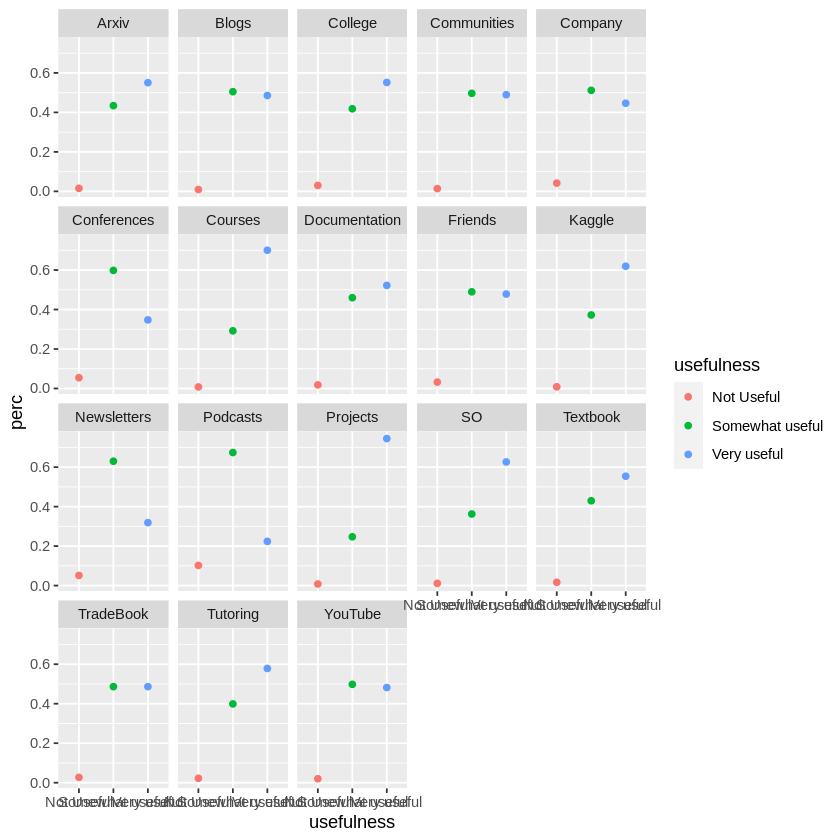

In [99]:
perc_useful_platform <- learning_platform_usefulness %>%
  # change dataset to one row per learning_platform usefulness pair with number of entries for each
  count(learning_platform, usefulness) %>%
  # use add_count to create column with total number of answers for that learning_platform
  add_count(learning_platform, wt = n, name='nn') %>%
  # create a new column, perc, that is the percentage of people giving that response for that learning_platform
  mutate(perc = n / nn)

# create a line graph for each question with usefulness on x-axis and percentage of responses on y
ggplot(perc_useful_platform, aes(x = usefulness, y = perc, color = usefulness)) + 
  geom_point() + 
  facet_wrap(~ learning_platform)

## 11) Mapping. Renaming from factors to numbers with if_else

In [100]:
learning_platform_usefulness %>%
    # If usefulness is "Not Useful", make 0, else 1 
    mutate(usefulness = if_else(usefulness == "Not Useful", 0, 1)) %>%
    head(2)

,learning_platform,usefulness
,<chr>,<dbl>
1,Arxiv,1
2,Arxiv,1


## 12) CASE_WHEN(): mapping with conditions

### 12)a) case_when() with single variable


check the min and max of the variable Age, removing NAs.

In [101]:
# Check the min age
min(multiple_choice_responses$Age, na.rm = TRUE)

# Check the max age
max(multiple_choice_responses$Age, na.rm = TRUE)

multiple_choice_responses %>%
    # Filter for rows where Age is between 10 and 90
    filter(between(Age, 10, 90)) %>%
    head(2)

[1] 0

[1] 100

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,⋯,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Female,United States,30,"Not employed, but looking for work",,,,,,,⋯,,,,,,,,Somewhat important,,
2,Male,Canada,28,"Not employed, but looking for work",,,,,,,⋯,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important


In [102]:
multiple_choice_responses %>%
    # Filter for rows where Age is between 10 and 90
    filter(between(Age, 10, 90)) %>%
    # Create the generation variable based on age
    mutate(generation = case_when(
    between(Age, 10, 22) ~ "Gen Z", 
    between(Age, 23, 37) ~ "Gen Y", 
    between(Age, 38, 52) ~ "Gen X", 
    between(Age, 53, 71) ~ "Baby Boomer", 
    between(Age, 72, 90) ~ "Silent"
    )) %>%
    head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,⋯,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,generation
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Female,United States,30,"Not employed, but looking for work",,,,,,,⋯,,,,,,,Somewhat important,,,Gen Y
2,Male,Canada,28,"Not employed, but looking for work",,,,,,,⋯,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Gen Y
3,Male,United States,56,"Independent contractor, freelancer, or self-employed",,,Yes,,Operations Research Practitioner,Poorly,⋯,,,,,,,,,,Baby Boomer
4,Male,Taiwan,38,Employed full-time,,,Yes,,Computer Scientist,Fine,⋯,,,,,,,,,,Gen X
5,Male,Brazil,46,Employed full-time,,,Yes,,Data Scientist,Fine,⋯,,,,,,,,,,Gen X
6,Male,United States,35,Employed full-time,,,Yes,,Computer Scientist,Fine,⋯,,,,,,,,,,Gen Y


Get a count of the number of people in each generation.



In [103]:
multiple_choice_responses %>%
    # Filter for rows where Age is between 10 and 90
    filter(between(Age, 10, 90)) %>%
    # Create the generation variable based on age
    mutate(generation = case_when(
    between(Age, 10, 22) ~ "Gen Z", 
    between(Age, 23, 37) ~ "Gen Y", 
    between(Age, 38, 52) ~ "Gen X", 
    between(Age, 53, 71) ~ "Baby Boomer", 
    between(Age, 72, 90) ~ "Silent"
    )) %>%
    # Get a count of how many answers in each generation
    count(generation)

generation,n
<chr>,<int>
Baby Boomer,832
Gen X,3162
Gen Y,10281
Gen Z,2037
Silent,37


### 12)b) case_when() two or more variables to map

#### Cleaning JobSatisfaction

In [129]:
unique(multiple_choice_responses$JobSatisfaction)

[1] "5"                       ""                       
 [3] "10 - Highly Satisfied"   "2"                      
 [5] "8"                       "7"                      
 [7] "6"                       "9"                      
 [9] "1 - Highly Dissatisfied" "I prefer not to share"  
[11] "3"                       "4"

In [131]:
multiple_choice_responses <- multiple_choice_responses %>%
    # rename the appropriate levels to "High school" and "Some college"
    mutate(JobSatisfaction = fct_recode(JobSatisfaction, 
    "NA" = '', "NA" = 'I prefer not to share',
    "10" = '10 - Highly Satisfied', '1' = '1 - Highly Dissatisfied'))

In [135]:
dim(multiple_choice_responses)

multiple_choice_responses <- multiple_choice_responses %>%
  mutate(JobSatisfaction = as.numeric(JobSatisfaction)) %>%
  filter(!is.na(JobSatisfaction))

[1] 16716   228

#### mapping with case_when

In [138]:
unique(multiple_choice_responses$DataScienceIdentitySelect)

[1] "Yes"                    "No"                     ""                      
[4] "Sort of (Explain more)"

In [136]:
multiple_choice_responses %>%
    # Filter out people who selected Data Scientist as their Job Title
    filter(CurrentJobTitleSelect != "Data Scientist") %>%
    # Create a new variable, job_identity
    mutate(job_identity = case_when(
        CurrentJobTitleSelect == "Data Analyst" & 
        DataScienceIdentitySelect == "Yes" ~ "DS analysts", 
        CurrentJobTitleSelect == "Data Analyst" & 
        DataScienceIdentitySelect %in% c("No", "Sort of (Explain more)") ~ "NDS analyst", 
        CurrentJobTitleSelect != "Data Analyst" & 
        DataScienceIdentitySelect == "Yes" ~ "DS non-analysts", 
        TRUE ~ "NDS non analysts")) %>%
    # Get the average job satisfaction by job_identity, removing NAs
    group_by(job_identity) %>%
    summarize(avg_js = mean(JobSatisfaction))

job_identity,avg_js
<chr>,<dbl>
DS analysts,5.303855
DS non-analysts,4.052935
NDS analyst,4.781250
NDS non analysts,2.674012


# GGPLOT Tricks

In [40]:
usefulness_by_platform <- perc_useful_platform %>%
  mutate(avg_usefulness = perc) %>%
  select(learning_platform, avg_usefulness)

## 1) Editing plot text and showing percentages


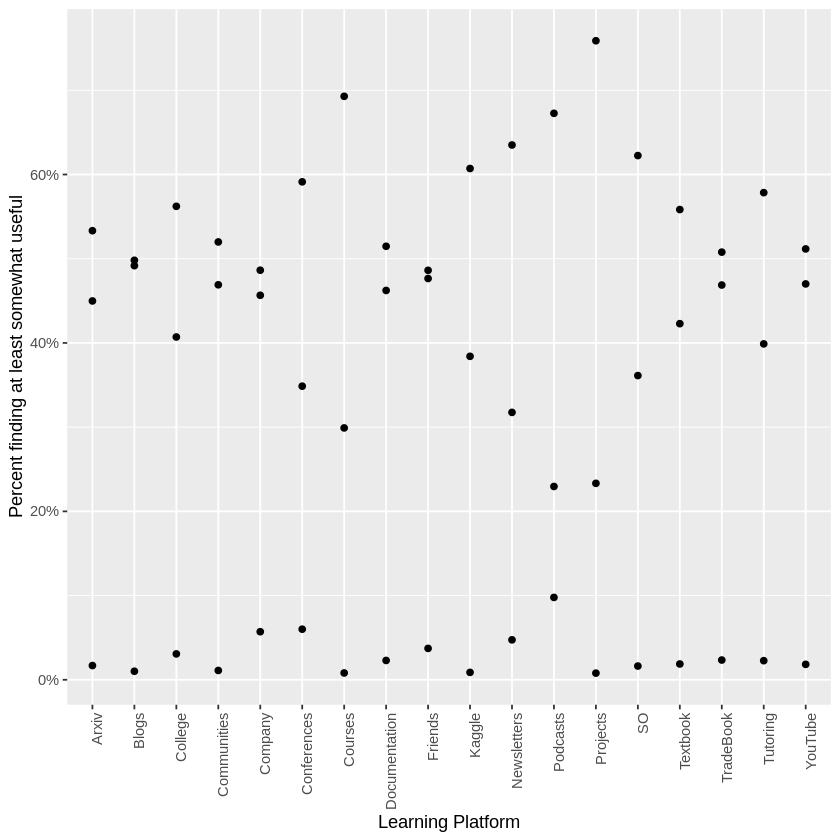

In [41]:
ggplot(usefulness_by_platform, aes(x = learning_platform, y = avg_usefulness)) + 
    geom_point() + 
    # rotate x-axis text by 90 degrees
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    # rename y and x axis labels
    labs(x = "Learning Platform", y = "Percent finding at least somewhat useful") + 
    # change y axis scale to percentage
    scale_y_continuous(labels = scales::percent)

## 2) Reordering graphs and changing angles on axis


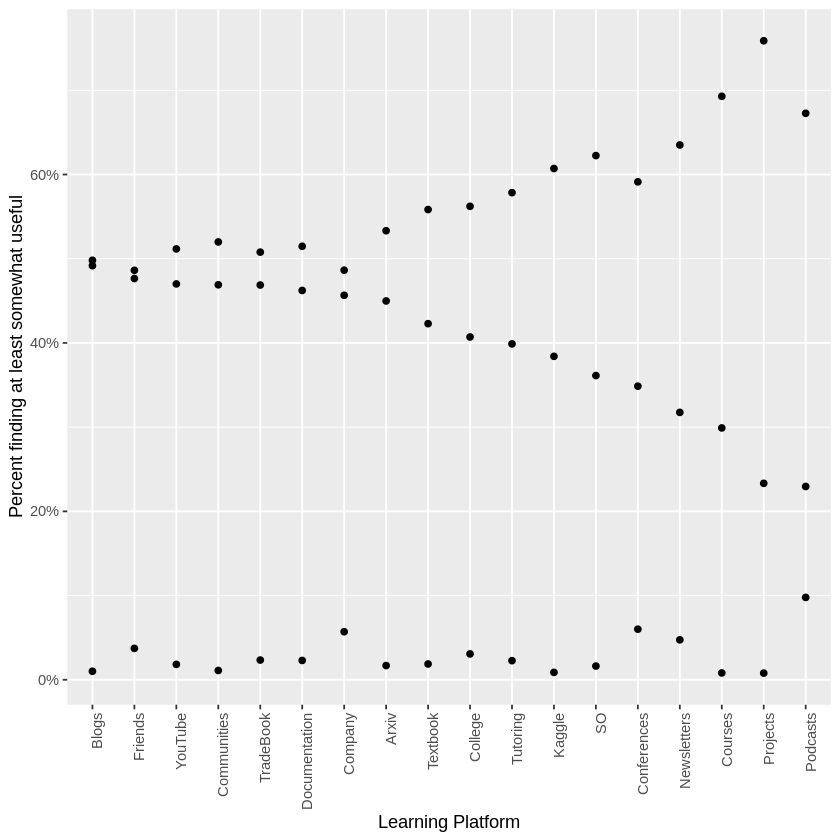

In [42]:
usefulness_by_platform %>%
	# reorder learning_platform by avg_usefulness
	mutate(learning_platform = fct_reorder(learning_platform, avg_usefulness)) %>%
	# reverse the order of learning_platform
	mutate(learning_platform = fct_rev(learning_platform)) %>%
	ggplot(aes(x = learning_platform, y = avg_usefulness)) + 
    geom_point() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) + 
    labs(x = "Learning Platform", y = "Percent finding at least somewhat useful") + 
    scale_y_continuous(labels = scales::percent)